In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./data/train.csv")
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
# We want our dataset as a numpy array
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Separating our data as the development data and training data (type of cross-validation training)

data_dev = data[0:1000].T
Y_dev = data_dev[0] # label
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0] # label
X_train = data_train[1:n]

X_train = X_train / 255
_,m_train = X_train.shape

# Shuffling our data to prevent overfitting


In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5 # previous layer has 10 perceptrons
    b2 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(x, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propagation(W1, b1, W2, b2, X):
    
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivative_ReLU(Z):
    return Z > 0 # Derivative equals 1 if greater, 0 if not
          
def back_propagation(Z1, A1, Z2, A2, W2, X, Y):
    
    dZ2 = A2 - one_hot(Y)
    dW2 = np.dot(dZ2 , A1.T) / m
    db2 = (np.sum(dZ2))/ m
    dZ1 = np.dot(W2.T , dZ2) * derivative_ReLU(Z1)

    dW1 = np.dot(dZ1, X.T) / m
    db1 = (np.sum(dZ1))/ m

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2    

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0) # Seleciona a maior probabilidade

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
     W1, b1, W2, b2 = init_params()

     for i in range(iterations):
         Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
         dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, X, Y)
         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
         if i % 10 == 0:
             predictions = get_predictions(A2)
             print(f"Iteration {i}: Accuracy {get_accuracy(predictions, Y)}")

     return W1, b1, W2, b2
     

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

[7 0 9 ... 7 9 9] [2 0 9 ... 3 1 4]
Iteration 0: Accuracy 0.13673170731707318
[6 0 5 ... 7 7 9] [2 0 9 ... 3 1 4]
Iteration 10: Accuracy 0.21226829268292682
[6 0 9 ... 7 7 2] [2 0 9 ... 3 1 4]
Iteration 20: Accuracy 0.34051219512195124
[6 0 9 ... 7 7 2] [2 0 9 ... 3 1 4]
Iteration 30: Accuracy 0.4245609756097561
[6 0 9 ... 3 7 2] [2 0 9 ... 3 1 4]
Iteration 40: Accuracy 0.4754390243902439
[6 0 9 ... 3 7 2] [2 0 9 ... 3 1 4]
Iteration 50: Accuracy 0.5193414634146342
[2 0 9 ... 3 1 2] [2 0 9 ... 3 1 4]
Iteration 60: Accuracy 0.5559268292682927
[2 0 9 ... 3 1 2] [2 0 9 ... 3 1 4]
Iteration 70: Accuracy 0.5864146341463414
[2 0 9 ... 3 1 4] [2 0 9 ... 3 1 4]
Iteration 80: Accuracy 0.6126829268292683
[2 0 9 ... 3 1 4] [2 0 9 ... 3 1 4]
Iteration 90: Accuracy 0.6361951219512195
[2 0 9 ... 3 1 4] [2 0 9 ... 3 1 4]
Iteration 100: Accuracy 0.6546829268292683
[2 0 9 ... 3 1 4] [2 0 9 ... 3 1 4]
Iteration 110: Accuracy 0.6718048780487805
[2 0 9 ... 3 1 4] [2 0 9 ... 3 1 4]
Iteration 120: Accuracy 

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


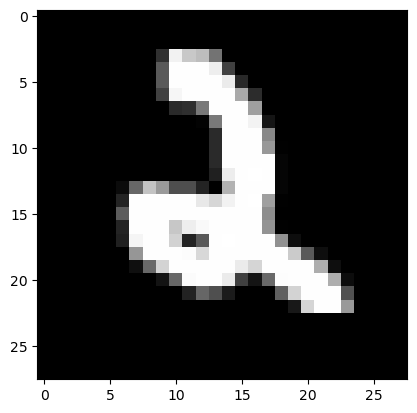

Prediction:  [0]
Label:  0


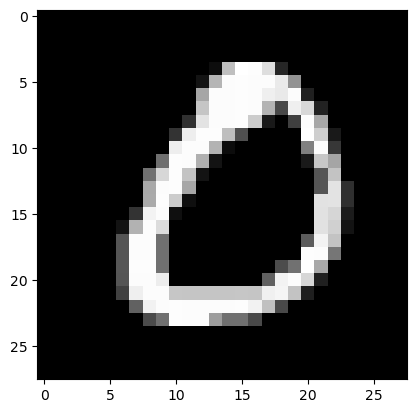

Prediction:  [9]
Label:  9


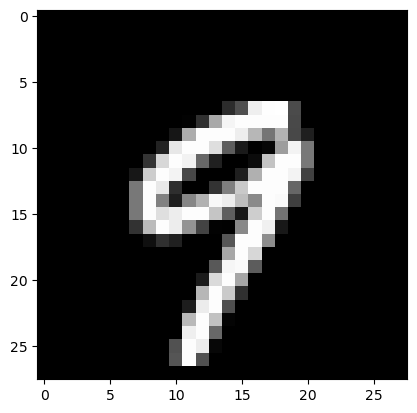

Prediction:  [7]
Label:  7


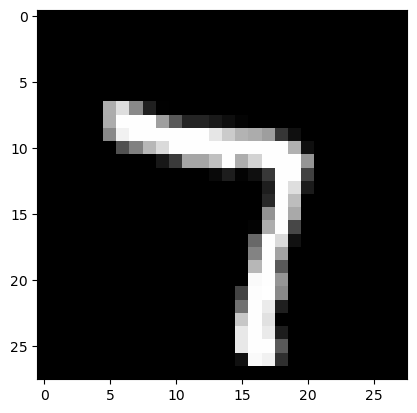

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(105, W1, b1, W2, b2)
